# Q1. What does a high correlation of returns imply for the long-term behavior of two asset prices?

As a quick answer, if two asset prices are highly correlated, their long-term behavior will tend to be similar (if they are positively correlated) or opposite (if they are negatively correlated). That is to say, if one tends to move up concerning its expected return, then we expect the other one to have a similar tendency, i.e., to move up concerning its expected return (if the correlation is positive) or the opposite (if the correlation is negative).

There are a couple of things worth taking in mind, though:

1. Correlation between assets is not easy to measure; more importantly, it doesn't generally remain static in time [1].
2. Correlation between assets can reduce Portfolio Risk [2]. It can also rise portfolio risk.
3. Evidence since 2021-22 confirms that relying on historical correlations to predict future correlations may give poor results [3]
4. correlation can be misinterpreted. Small sample sizes may yield unreliable results, even if it appears as though correlation between two variables is strong. Alternatively, a small sample size may yield uncorrelated findings when the two variables are in fact linked. Correlation is often skewed when an outlier is present. Correlation only shows how one variable is connected to another and may not clearly identify how a single instance or outcome can impact the correlation coefficient. Correlation may also be misinterpreted if the relationship between two variables is nonlinear. It is much easier to identify two variables with a positive or negative correlation. However, two variables may still be correlated with a more complex relationship.


Let's suppose we are comparing the two assets $S_1$ and $S_2$ long-term behavior, and these assets are highly correlated, i.e., $corr(S_1, S_2)\approx1$ (if highly positive correlated, otherwise $corr(S_1, S_2)\approx -1$).

We can simulate these behaviors using the log-normal model for stock prices (assuming assets as stocks), meaning

$dS_1 ={\mu}_1 S_1 dt + {\sigma}_1 S_1 {dZ}_1$ 

$dS_2 ={\mu}_2 S_2 dt + {\sigma}_2 S_2 {dZ}_2$ 

The *drift* $\mu$ is responsible for the long-term behavior, as can be seen by the following plot, where $\mu=0.1$



mean Sf = 915.2731
mean yearly return = 0.1017


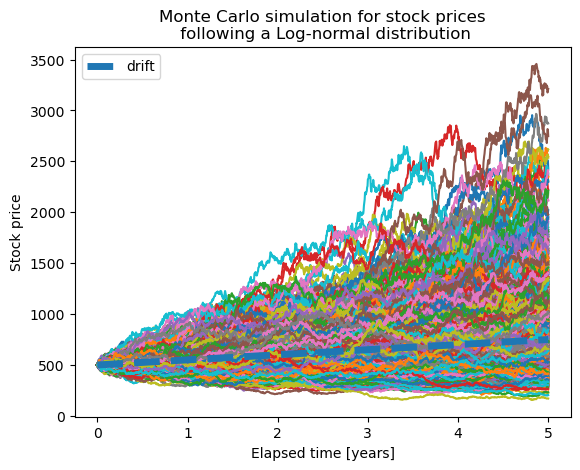

In [10]:
import numpy as np 
import matplotlib.pyplot as plt 

vol = 0.2 # annualized volatility
mu = 0.1 # drift
T = 5 # number of years to simulate
M = T * 252 # number of BD to simulate
dt = T/M # year fraction
S0 = 500 # initial stock price
N = 1000 # number of paths
S = np.zeros((M+1, N)) # vector to save simulated paths
S[0] = S0 # set initial value to spot 
for t in range(1, M+1):
    dz = np.random.standard_normal(N)
    S[t] = S[t-1] * np.exp(mu * dt + vol * np.sqrt(dt)*dz) # exact solution for the differential equation above, 
                                                           # considering vol and mu to be constant

# plot simulation
x = np.linspace(0, T, M+1)
plt.plot(x, S)
plt.ylabel('Stock price')
plt.xlabel('Elapsed time [years]')
plt.title('Monte Carlo simulation for stock prices\n following a Log-normal distribution')
plt.plot(x, mu*x*S0 + S0,'--', linewidth=5, label='drift')
plt.legend()

print(f'mean Sf = {np.round(np.mean(S[-1]),4)}')
print(f'mean yearly return = {np.round(np.mean(np.log(S[-1]/S0)/T),4)}')

Given that the returns are 

$$ r_i = \ln \Bigg( \frac{S_i}{S_{i-1}}\Bigg) $$

the expected annual return is 

$$\mu = \frac{1}{5} * E \Bigg( \ln \Bigg( \frac{S_T}{S_{0}}\Bigg) \Bigg) = \frac{1}{5} * mean \Bigg( \ln \Bigg( \frac{S_T}{S_{0}}\Bigg) \Bigg)$$

No handles with labels found to put in legend.


$\mu$ = 0.0004
$\sigma$ = 0.013


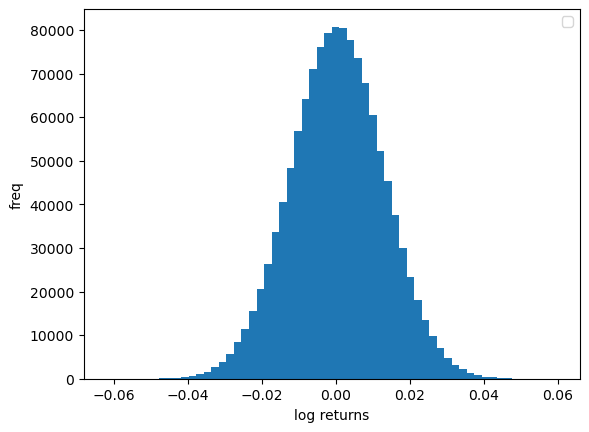

In [11]:
# Distribution of Stock returns
import scipy.stats as scs
returns = np.log(S[1:]/S[:-1])
plt.hist(returns.flatten(), bins=60)
x = np.linspace(plt.axis()[0], plt.axis()[1])
#plt.plot(x, scs.norm.pdf(x,loc=mu,),'r', lw=2.0, label='pdf')
plt.xlabel('log returns')
plt.ylabel('freq')
plt.legend()
print(r'$\mu$ = %.4f'%np.mean(returns))
print(r'$\sigma$ = %.3f'%np.std(returns))

In [12]:
# and the volatility is 
print(f'vol ={np.round(np.std(returns)/np.sqrt(M/T),4)}')

vol =0.0008


Now let's simulate the 2 correlated stocks to compare

In [13]:
vol1, vol2 = 0.17, 0.12 # annualized volatility
mu1, mu2 = 0.07, 0.15 # drift
T = 5 # number of years to simulate
M = T * 252 # number of BD to simulate
dt = T/M # year fraction
S10, S20 = 500, 120 # initial stock price
N = 1000 # number of paths
S1, S2 = np.zeros((M+1, N)), np.zeros((M+1, N)) # vector to save simulated paths
S1[0], S2[0] = S10, S20 # set initial value to spot 
mean = [0, 0]
rho = 0.8 # fixed correlation btw 2 BM
corr_mat = np.zeros((2,2))
corr_mat[0,:] = [1., rho]
corr_mat[1,:] = [rho, 1.]
cho_mat = np.linalg.cholesky(corr_mat)
ran_num = np.random.standard_normal((2, M + 1, N)) # corr rn
z1 = np.zeros_like(ran_num[0])
z2 = np.zeros_like(z1)
for t in range(1, M+1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    S1[t] = S1[t-1] * np.exp(mu1 * dt + vol1 * np.sqrt(dt)*z1) # exact solution for the differential equation above, 
                                                           # considering vol and mu to be constant
    S2[t] = S2[t-1] * np.exp(mu2 * dt + vol2 * np.sqrt(dt)*z2) # exact solution for the differential equation above, 
                                                           # considering vol and mu to be constant

# plot some simulation's paths
fig, axs = plt.subplots(3,3, figsize=(12,12))
x = np.linspace(0, T, M+1)
ax = axs.flatten()
for i in range(len(ax)):
    ax[i].plot(x, S1[:,i], label='S1')
    ax[i].plot(x, S2[:,i], label='S2')

    ax[i].plot(x, mu1*x*S10 + S10,'--', linewidth=5, label='drift 1')
    ax[i].plot(x, mu2*x*S20 + S20,'--', linewidth=5, label='drift 2')

ax[0].set_ylabel('Stock price')
ax[8].set_xlabel('Elapsed time [years]')
ax[0].legend()
print('Monte Carlo simulation for highly correlated stock prices\n following a Log-normal distribution\nfirst 9 paths')
fig.tight_layout()
print(f'mean Sf1 = {np.round(np.mean(S1[-1]),4)}')
print(f'mean Sf2 = {np.round(np.mean(S2[-1]),4)}')
print(f'mean S1 yearly return = {np.round(np.mean(np.log(S1[-1]/S10)/T),4)}')
print(f'mean S2 yearly return = {np.round(np.mean(np.log(S2[-1]/S20)/T),4)}')

ValueError: could not broadcast input array from shape (1261,1000) into shape (1000,)

and plot the returns

Monte Carlo simulation for highly correlated stock returns
 following a normal distribution
first 9 paths


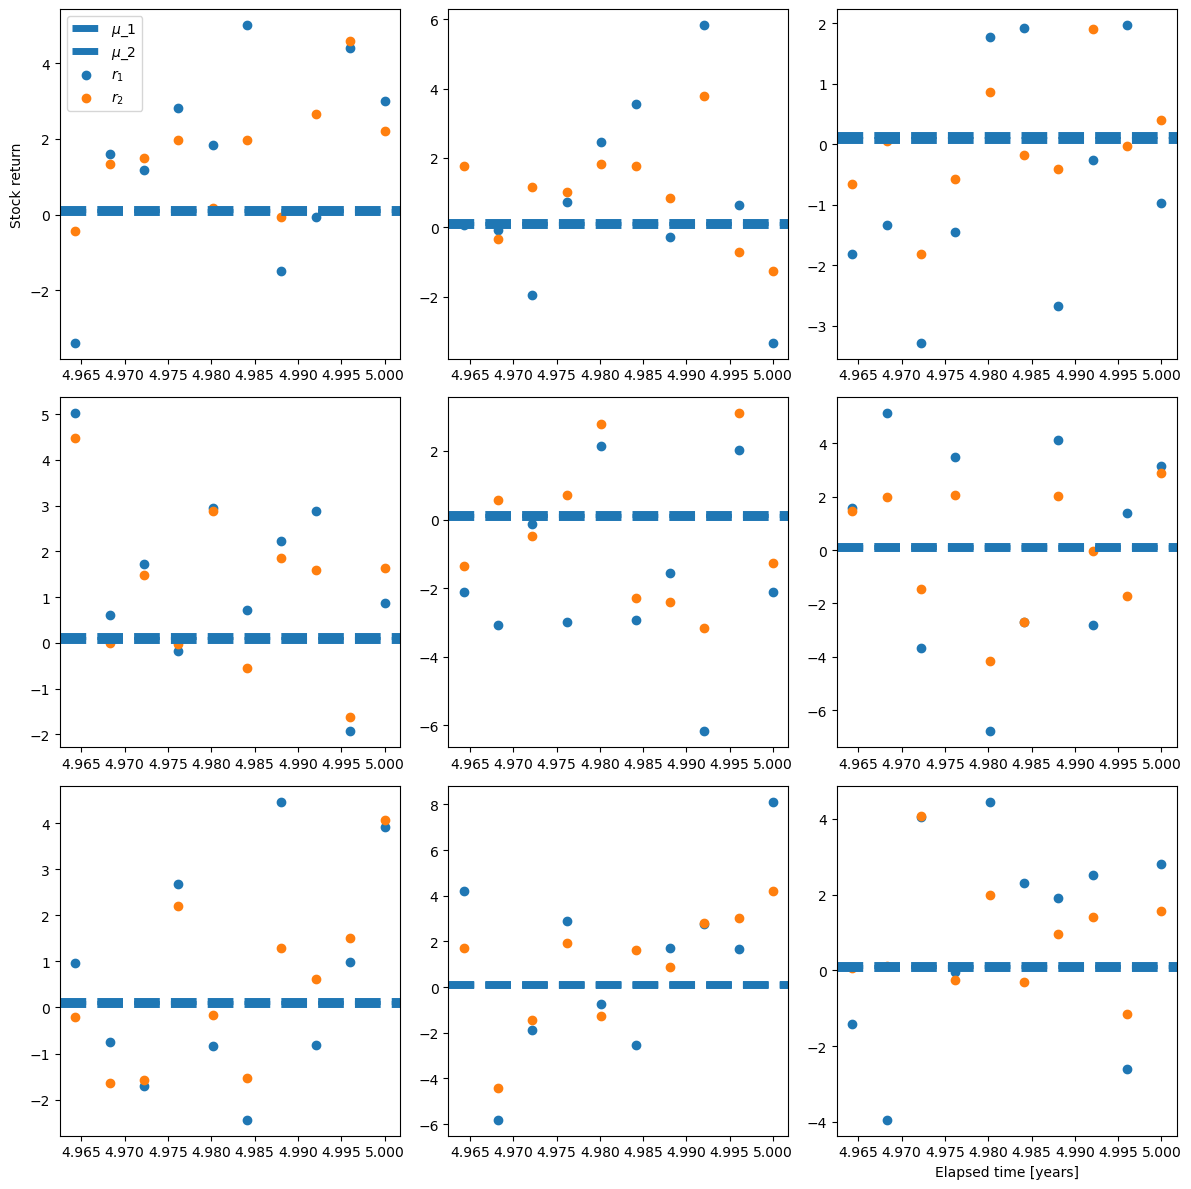

In [ ]:
# plot some simulation's paths
fig, axs = plt.subplots(3,3, figsize=(12,12))
x = np.linspace(0, T, M+1)
ax = axs.flatten()
returns1 = np.log(S1[1:]/S1[:-1])*M/T
returns2 = np.log(S2[1:]/S2[:-1])*M/T
for i in range(len(ax)):
    ax[i].scatter(x[-10:], returns1[-10:,i], label=r'$r_1$')
    ax[i].scatter(x[-10:], returns2[-10:,i], label=r'$r_2$')

    ax[i].axhline(mu1,linestyle='--', linewidth=5, label=r'$\mu$_1')
    ax[i].axhline(mu2,linestyle='--', linewidth=5, label=r'$\mu$_2')

ax[0].set_ylabel('Stock return')
ax[8].set_xlabel('Elapsed time [years]')
ax[0].legend()
print('Monte Carlo simulation for highly correlated stock returns\n following a normal distribution\nfirst 9 paths')
fig.tight_layout()


In [ ]:
returns1

array([[-1.60249266, -3.94675788,  0.47205417, ..., -0.40898228,
        -6.80805423,  2.52326987],
       [ 1.00332555, -0.16361756, -0.15497254, ...,  1.60398112,
        -0.13208009,  2.13532588],
       [-1.26931922, -1.32489041,  3.23170335, ..., -2.77820418,
        -2.24436407,  3.42080675],
       ...,
       [-0.06967426,  5.83600075, -0.25880511, ..., -0.86247959,
        -2.00649495, -0.28603491],
       [ 4.39766974,  0.64377887,  1.97117213, ..., -1.19602583,
        -2.20318539,  3.75671617],
       [ 2.99351927, -3.33336528, -0.96450198, ..., -4.21144778,
         0.7690722 ,  3.68129343]])

No handles with labels found to put in legend.


mean yearly return = 0.104


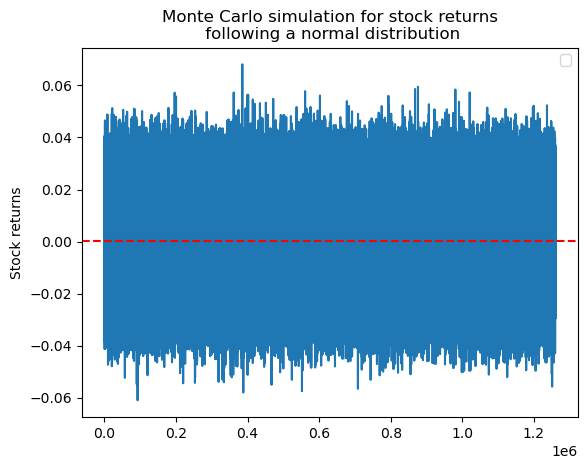

In [ ]:
vol = 0.2 # annualized volatility
mu = 0.1 # drift
T = 5 # number of years to simulate
M = T * 252 # number of BD to simulate
dt = T/M # year fraction
S0 = 500 # initial stock price
N = 1000 # number of paths
S = np.zeros((M+1, N)) # vector to save simulated paths
S[0] = S0 # set initial value to spot 
for t in range(1, M+1):
    dz = np.random.standard_normal(N)
    S[t] = S[t-1] * np.exp(mu * dt + vol * np.sqrt(dt)*dz) # exact solution for the differential equation above, 
                                                           # considering vol and mu to be constant

# plot simulation
x = np.linspace(0, T, M+1)
plt.plot(np.log(S[1:]/S[:-1]).flatten())
plt.ylabel('Stock returns')
#plt.xlabel('Elapsed time [years]')
plt.title('Monte Carlo simulation for stock returns\n following a normal distribution')
plt.axhline(np.cumsum(np.mean(np.log(S[1:]/S[:-1])))[0],linestyle='--',c='r')
#plt.plot(x, mu,'--', linewidth=5, label='drift')
plt.legend()

print(f'mean yearly return = {np.round(np.mean(np.log(S[-1]/S0)/T),4)}')

mean Sf = 599.7269
mean long-term return = 0.1995


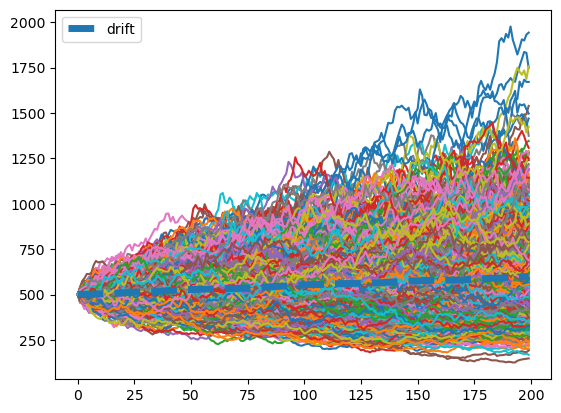

In [ ]:
vol1, vol2 = 0.17, 0.12
mu1, mu2 = 0.07, 0.15
ndays = 200
S01, S02 = 500, 500
N = 1000

dz1 = np.random.normal(mu1/ndays, vol1/np.sqrt(ndays), (N,ndays))+1
dz2 = dz1
S1 = np.ones((ndays, N))*S01
drift = np.ones(ndays)*S01

for j in range(1,ndays):
    S1[j] = S1[j-1]*dz1[:,j]
    drift[j] = np.mean(S1[j])
Sf = S1[-1,:]

plt.plot(S1)
plt.plot(drift,'--', linewidth=5, label='drift')
plt.legend()

print(f'mean Sf = {np.round(np.mean(Sf),4)}')
print(f'mean long-term return = {np.round(np.mean(Sf)/S01-1,4)}')

If $\mu$ changes, that would change the stock long-term behavior, as can be seen by the following plots. Notice that it doesn't mean that any individual path would have that one, only in average

mean Sf = 306.3469
mu = -0.5
mean long-term return = -0.3873
mean Sf = 325.5003
mu = -0.4091
mean long-term return = -0.349
mean Sf = 370.6398
mu = -0.3182
mean long-term return = -0.2587
mean Sf = 391.1383
mu = -0.2273
mean long-term return = -0.2177
mean Sf = 439.0239
mu = -0.1364
mean long-term return = -0.122
mean Sf = 478.4537
mu = -0.0455
mean long-term return = -0.0431
mean Sf = 523.8534
mu = 0.0455
mean long-term return = 0.0477
mean Sf = 572.574
mu = 0.1364
mean long-term return = 0.1451
mean Sf = 626.1977
mu = 0.2273
mean long-term return = 0.2524
mean Sf = 690.2472
mu = 0.3182
mean long-term return = 0.3805
mean Sf = 746.7158
mu = 0.4091
mean long-term return = 0.4934
mean Sf = 810.7579
mu = 0.5
mean long-term return = 0.6215


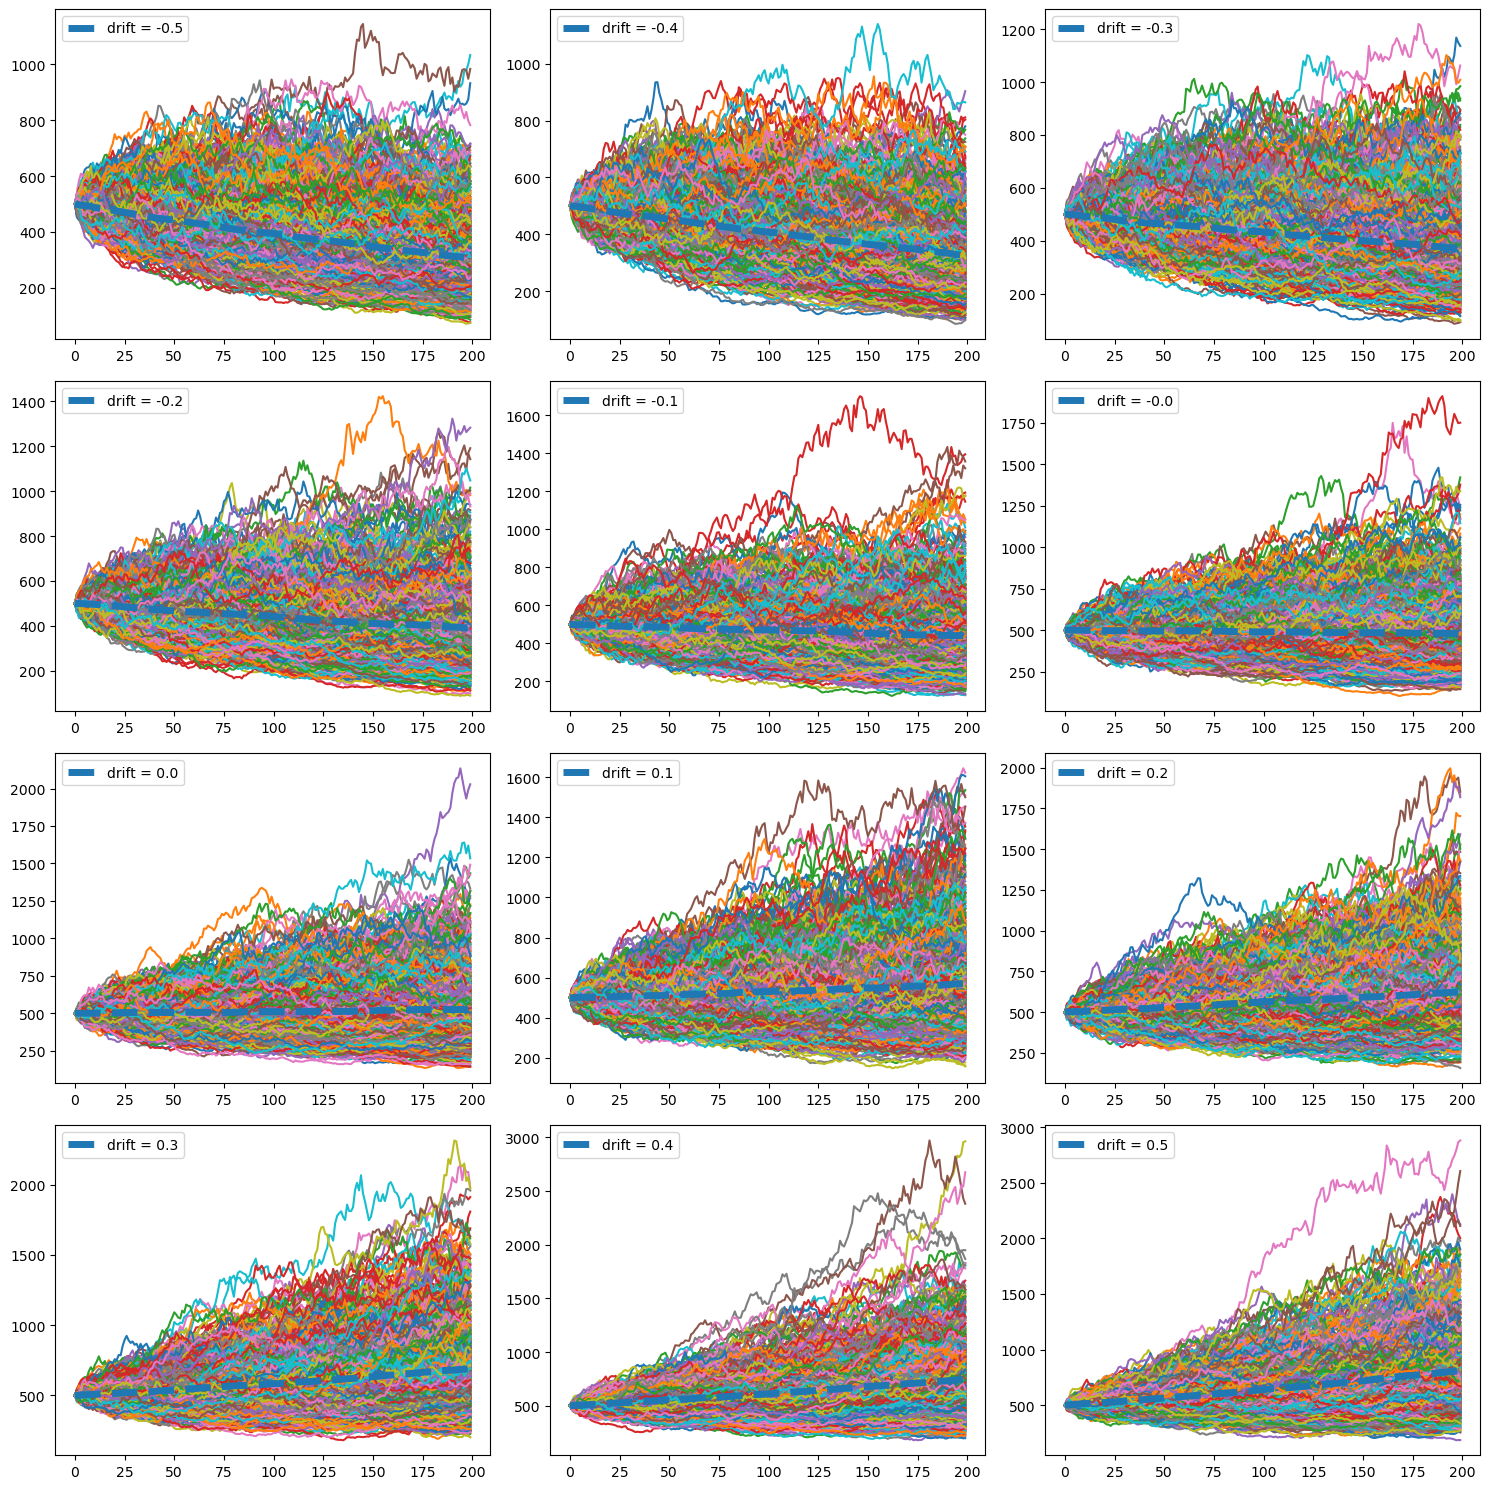

In [ ]:
# define parameters
vol = 0.4 # volatility
mus = np.linspace(-0.5,0.5,12) # different drifts, from -0.5 to 0.5
ndays = 200 # number of simulated days
S0 = 500 # initial stock price
N = 1000 # number of iterations for Monte Carlo simulation

# plot multiple plots with different drifts
fig, axs = plt.subplots(4,3, figsize=(15,15)) 

for i, mu in enumerate(mus):
    ax = axs.flat[i]
    dz = np.random.normal(mu/ndays, vol/np.sqrt(ndays), (N,ndays))+1

    S = np.ones((ndays, N))*S0
    drift = np.ones(ndays)*S0

    for j in range(1,ndays):
        S[j] = S[j-1]*dz[:,j]
        drift[j] = np.mean(S[j])
    Sf = S[-1,:]

    ax.plot(S)
    ax.plot(drift,'--', linewidth=5, label=f'drift = {np.round(mu,1)}')
    ax.legend()
    fig.tight_layout()
    print(f'mean Sf = {np.round(np.mean(Sf),4)}')
    print(f'mu = {np.round(mu,4)}')
    print(f'mean long-term return = {np.round(np.mean(Sf)/S01-1,4)}')

corr(X,Y) = [[1. 1.]
 [1. 1.]]


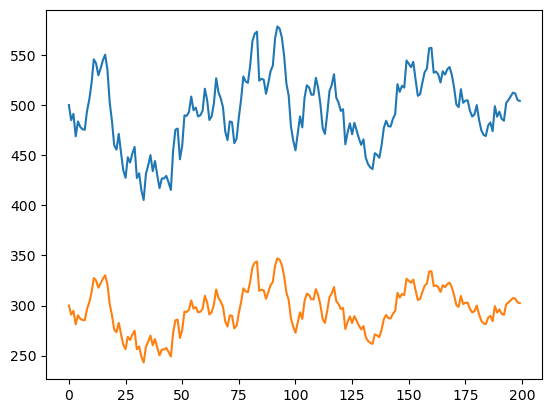

In [ ]:
# define parameters
vol = 0.4 # volatility
mu = 0.2 # drift
ndays = 200 # number of simulated days
X0, Y0 = 500, 300 # initial stock price
X, Y = np.ones(ndays)*X0, np.ones(ndays)*Y0 # initialize stock prices vectors
dz = np.random.normal(mu/ndays, vol/np.sqrt(ndays), ndays)+1 # random stock price change

# example of 2 highly correlated stock prices
for j in range(1,ndays):
    X[j] = X[j-1]*dz[j]
    Y[j] = Y[j-1]*dz[j]

plt.plot(X, label='X')
plt.plot(Y, label='Y')

print(f'corr(X,Y) = {np.corrcoef(X,Y)}')

corr(X,Y) = [[1.         0.32801105]
 [0.32801105 1.        ]]
corr(X,Y) = 0.33


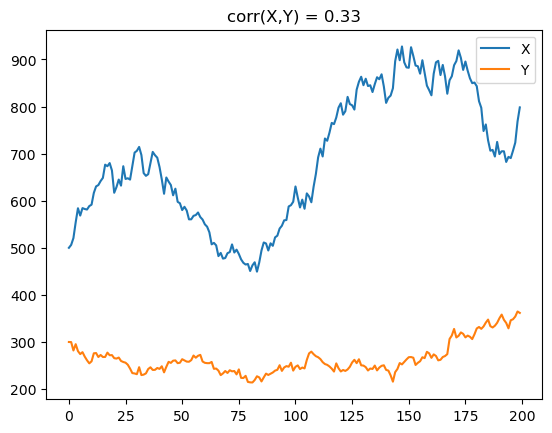

In [ ]:
# example of 2 non-highly correlated stock prices
np.random.seed(0)
dz1 = np.random.normal(mu/ndays, vol/np.sqrt(ndays), ndays)+1 # random stock price change
np.random.seed(2)
dz2 = np.random.normal(mu/ndays, vol/np.sqrt(ndays), ndays)+1 # random stock price change
for j in range(1,ndays):
    X[j] = X[j-1]*dz1[j]
    Y[j] = Y[j-1]*dz2[j]

plt.plot(X, label='X')
plt.plot(Y, label='Y')
plt.title(f'corr(X,Y) = {np.round(np.corrcoef(X,Y)[0,1],2)}')
plt.legend()
print(f'corr(X,Y) = {np.corrcoef(X,Y)}')
print(f'corr(X,Y) = {np.round(np.corrcoef(X,Y)[0,1],2)}')

corr(X,Y) = [[1.         0.67129582]
 [0.67129582 1.        ]]
corr(X,Y) = 0.67


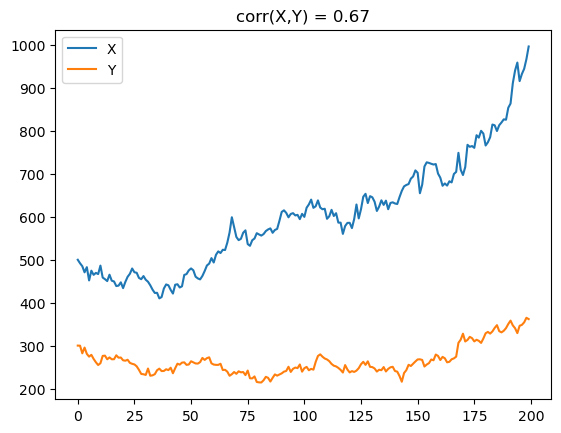

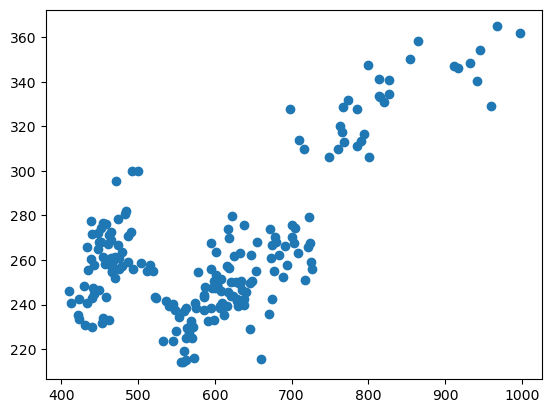

In [ ]:
# example of 2 highly correlated stock prices
np.random.seed(1)
dz1 = np.random.normal(mu/ndays, vol/np.sqrt(ndays), ndays)+1 # random stock price change
np.random.seed(2)
dz2 = np.random.normal(mu/ndays, vol/np.sqrt(ndays), ndays)+1 # random stock price change
for j in range(1,ndays):
    X[j] = X[j-1]*dz1[j]
    Y[j] = Y[j-1]*dz2[j]

plt.plot(X, label='X')
plt.plot(Y, label='Y')
plt.title(f'corr(X,Y) = {np.round(np.corrcoef(X,Y)[0,1],2)}')
plt.legend()
print(f'corr(X,Y) = {np.corrcoef(X,Y)}')
print(f'corr(X,Y) = {np.round(np.corrcoef(X,Y)[0,1],2)}')
plt.figure()
plt.scatter(X,Y)

corr(X,Y) = [[1. 1.]
 [1. 1.]]
corr(X,Y) = 1.0


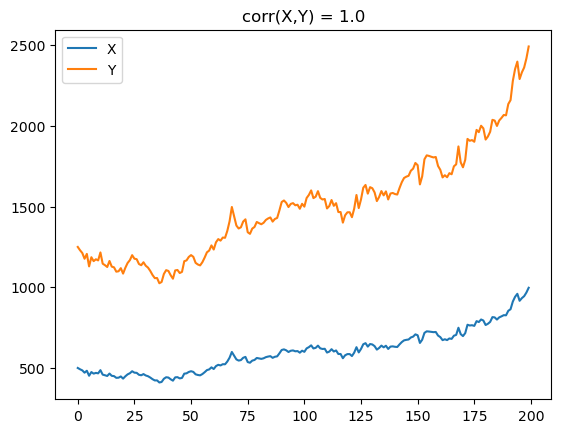

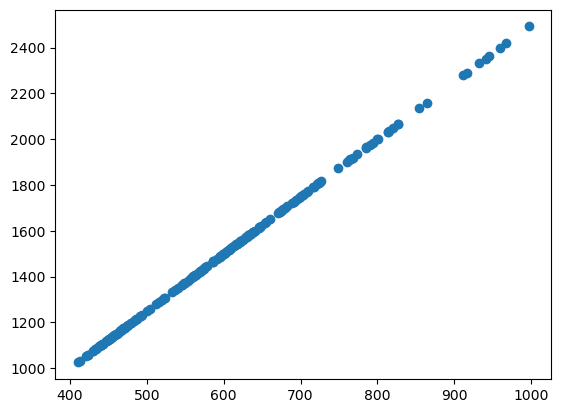

In [ ]:
# example of 2 highly correlated stock prices
np.random.seed(1)
dz1 = np.random.normal(mu/ndays, vol/np.sqrt(ndays), ndays)+1 # random stock price change
np.random.seed(2)
dz2 = np.random.normal(mu/ndays, vol/np.sqrt(ndays), ndays)+1 # random stock price change
for j in range(1,ndays):
    X[j] = X[j-1]*dz1[j]
    
Y = 2.5*X
plt.plot(X, label='X')
plt.plot(Y, label='Y')
plt.title(f'corr(X,Y) = {np.round(np.corrcoef(X,Y)[0,1],2)}')
plt.legend()
print(f'corr(X,Y) = {np.corrcoef(X,Y)}')
print(f'corr(X,Y) = {np.round(np.corrcoef(X,Y)[0,1],2)}')
plt.figure()
plt.scatter(X,Y)

corr(X,Y) = [[1.         0.97636703]
 [0.97636703 1.        ]]
corr(X,Y) = 0.98


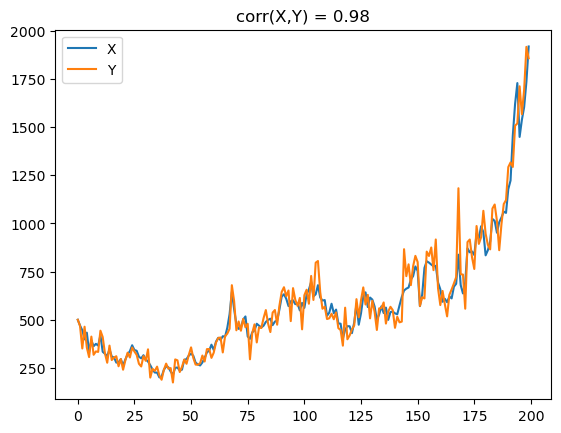

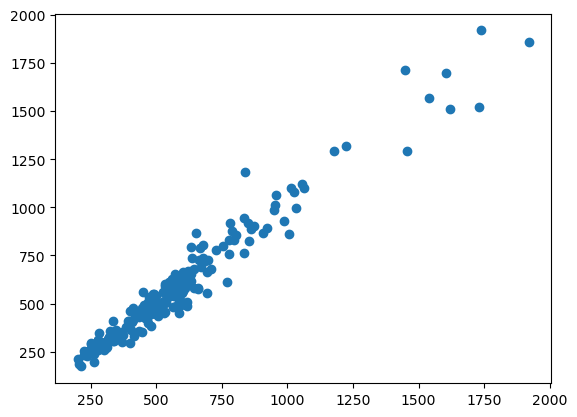

In [ ]:
# example of 2 highly correlated stock prices
X[0], Y[0] = 500, 500
np.random.seed(1)
dz1 = np.random.normal(mu/ndays, 0.1, ndays)+1 # random stock price change
np.random.seed(2)
dz2 = np.random.normal(mu/ndays, 0.1, ndays)+1 # random stock price change
for j in range(1,ndays):
    X[j] = X[j-1]*dz1[j]
    Y[j] = X[j]*dz2[j]

plt.plot(X, label='X')
plt.plot(Y, label='Y')
plt.title(f'corr(X,Y) = {np.round(np.corrcoef(X,Y)[0,1],2)}')
plt.legend()
print(f'corr(X,Y) = {np.corrcoef(X,Y)}')
print(f'corr(X,Y) = {np.round(np.corrcoef(X,Y)[0,1],2)}')
plt.figure()
plt.scatter(X,Y)

(array([ 9., 13., 30., 52., 48., 32., 10.,  4.,  1.,  1.]),
 array([0.73505505, 0.80273648, 0.8704179 , 0.93809932, 1.00578074,
        1.07346216, 1.14114358, 1.208825  , 1.27650642, 1.34418784,
        1.41186926]),
 <BarContainer object of 10 artists>)

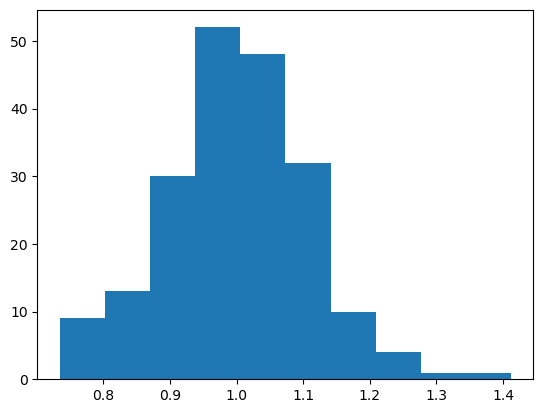

In [ ]:
plt.hist(dz2)

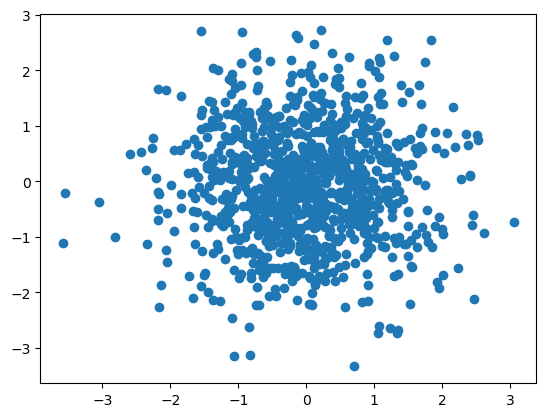

In [ ]:
mean = [0,0]
cov = [[1, 0],
       [0, 1]]
X, Y = np.random.multivariate_normal(mean, cov, N).T
plt.scatter(X,Y) 

corr(X,Y) = 0.48
corr(X1,Y1) = 0.82
corr(X2,Y2) = 0.42


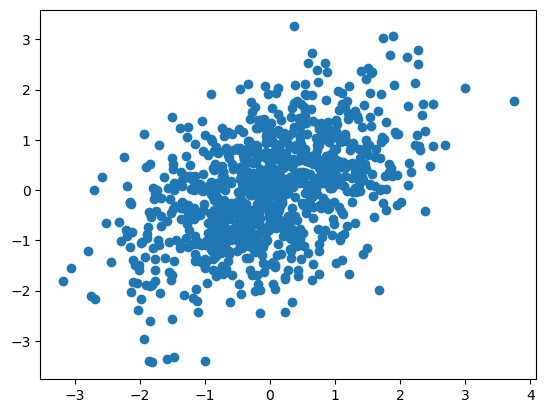

In [ ]:
mean = [0,0]
cov = [[1, 0.5],
       [0.5, 1]]
X, Y = np.random.multivariate_normal(mean, cov, N).T
X1, Y1 = X[abs(X)>=1.96], Y[abs(X)>=1.96]
X2, Y2 = X[abs(X)<1.96], Y[abs(X)<1.96]
plt.scatter(X,Y) 
print(f'corr(X,Y) = {np.round(np.corrcoef(X,Y)[0,1],2)}')
print(f'corr(X1,Y1) = {np.round(np.corrcoef(X1,Y1)[0,1],2)}')
print(f'corr(X2,Y2) = {np.round(np.corrcoef(X2,Y2)[0,1],2)}')

In [ ]:
vol/np.sqrt(ndays)

0.0282842712474619

corr(dz1, dz2) = 0.83
corr(X,Y) = [[1.         0.82639127]
 [0.82639127 1.        ]]
corr(X,Y) = 0.83


Text(0, 0.5, 'Y')

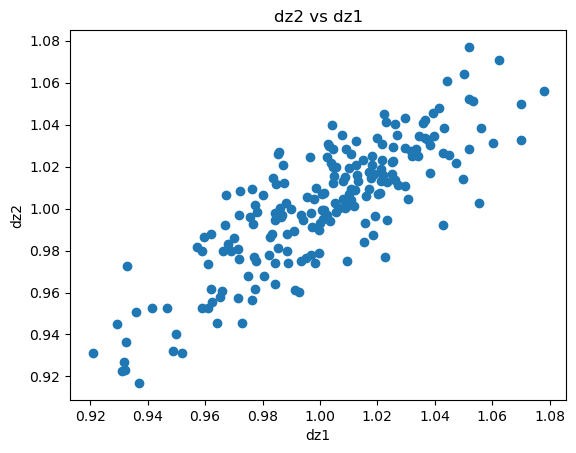

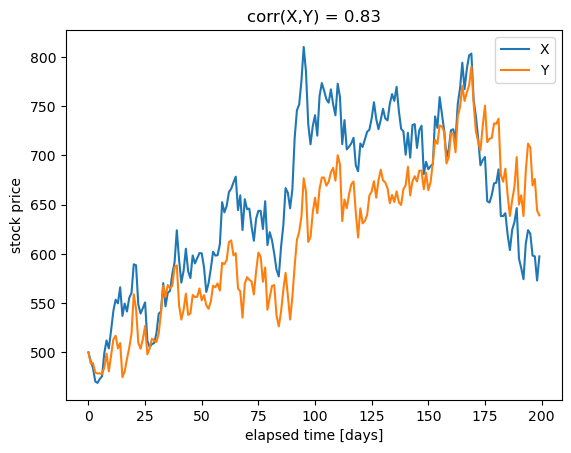

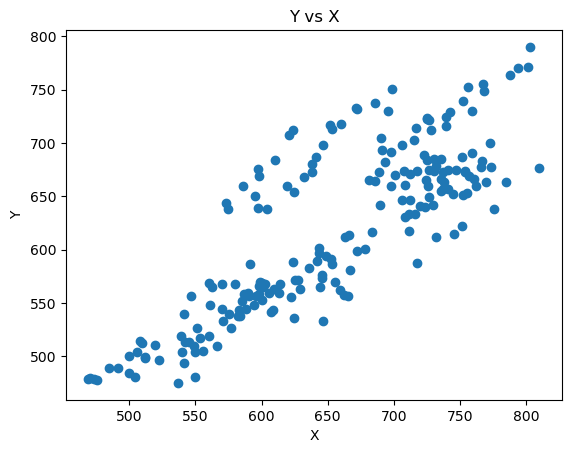

In [ ]:
mean = [mu/ndays, mu/ndays]
corr = 0.8
cov = [[(vol/np.sqrt(ndays))**2, corr*(vol/np.sqrt(ndays))**2],
       [corr*(vol/np.sqrt(ndays))**2, (vol/np.sqrt(ndays))**2]]
dz1, dz2 = np.random.multivariate_normal(mean, cov, ndays).T + np.ones((2,ndays))
X[0], Y[0] = 500, 500
X, Y = np.ones(ndays)* X[0], np.ones(ndays)*Y[0]
plt.title('dz2 vs dz1')
plt.scatter(dz1, dz2)
plt.xlabel('dz1')
plt.ylabel('dz2') 
print(f'corr(dz1, dz2) = {np.round(np.corrcoef(dz1, dz2)[0,1],2)}')

for j in range(1,ndays):
    X[j] = X[j-1]*dz1[j]
    Y[j] = Y[j-1]*dz2[j]
plt.figure()
plt.plot(X, label='X')
plt.plot(Y, label='Y')
plt.xlabel('elapsed time [days]')
plt.ylabel('stock price')
plt.title(f'corr(X,Y) = {np.round(np.corrcoef(X,Y)[0,1],2)}')
plt.legend()
print(f'corr(X,Y) = {np.corrcoef(X,Y)}')
print(f'corr(X,Y) = {np.round(np.corrcoef(X,Y)[0,1],2)}')
plt.figure()
plt.scatter(X,Y)
plt.title('Y vs X')
plt.xlabel('X')
plt.ylabel('Y')

corr(dz1, dz2) = 0.78
corr(X,Y) = [[1.         0.90570977]
 [0.90570977 1.        ]]
corr(X,Y) = 0.78


Text(0, 0.5, 'Y')

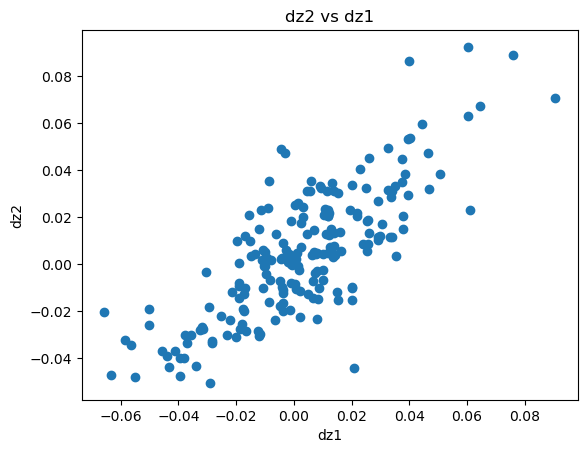

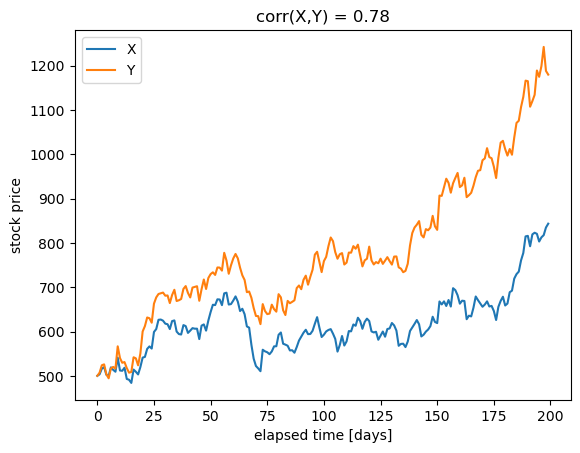

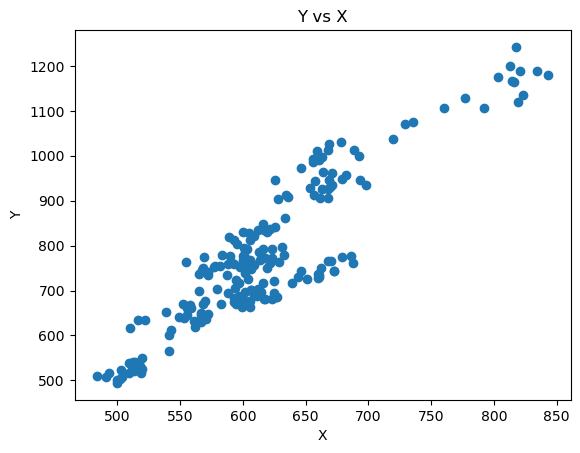

In [ ]:
mean = [mu/ndays, mu/ndays]
corr = 0.8
cov = [[(vol/np.sqrt(ndays))**2, corr*(vol/np.sqrt(ndays))**2],
       [corr*(vol/np.sqrt(ndays))**2, (vol/np.sqrt(ndays))**2]]
dz1, dz2 = np.random.multivariate_normal(mean, cov, ndays).T 
X[0], Y[0] = 500, 500
X, Y = np.ones(ndays)* X[0], np.ones(ndays)*Y[0]
plt.title('dz2 vs dz1')
plt.scatter(dz1, dz2)
plt.xlabel('dz1')
plt.ylabel('dz2') 
print(f'corr(dz1, dz2) = {np.round(np.corrcoef(dz1, dz2)[0,1],2)}')

#for j in range(1,ndays):
#    X[j] = X[j-1]*dz1[j]
#    Y[j] = Y[j-1]*dz2[j]

X[1:] = X[0] * np.exp(np.cumsum(dz1[1:]))
Y[1:] = Y[0] * np.exp(np.cumsum(dz2[1:]))
plt.figure()
plt.plot(X, label='X')
plt.plot(Y, label='Y')
plt.xlabel('elapsed time [days]')
plt.ylabel('stock price')
plt.title(f'corr(X,Y) = {np.round(np.corrcoef((X[1:]-X[:-1])/X[:-1],(Y[1:]-Y[:-1])/Y[:-1])[0,1],2)}')
plt.legend()
print(f'corr(X,Y) = {np.corrcoef(X,Y)}')
print(f'corr(X,Y) = {np.round(np.corrcoef((X[1:]-X[:-1])/X[:-1],(Y[1:]-Y[:-1])/Y[:-1])[0,1],2)}')
plt.figure()
plt.scatter(X,Y)
plt.title('Y vs X')
plt.xlabel('X')
plt.ylabel('Y')

-0.004830888942900984
[0.001, 0.001]
[[0.0008, 0.022627416997969524], [0.022627416997969524, 0.0008]]


/tmp/ipykernel_5611/1895987507.py:4: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  dz1, dz2 = np.random.multivariate_normal(mean, cov, ndays).T


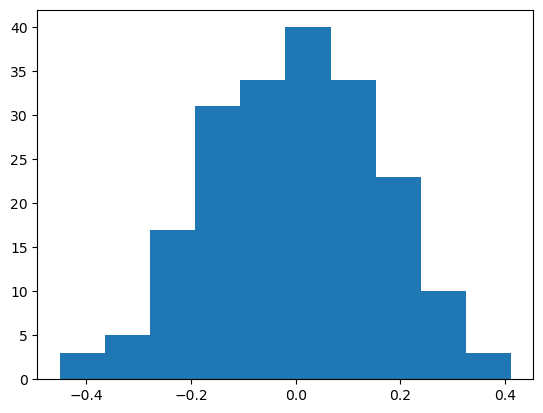

In [ ]:
corr = 0.8
cov = [[(vol/np.sqrt(ndays))**2, corr*(vol/np.sqrt(ndays))],
       [corr*(vol/np.sqrt(ndays)), (vol/np.sqrt(ndays))**2]]
dz1, dz2 = np.random.multivariate_normal(mean, cov, ndays).T
#np.all(dz1>0)
plt.hist(dz1)
print(np.mean(dz1))
print(mean)
print(cov)

-0.0019507655383474388


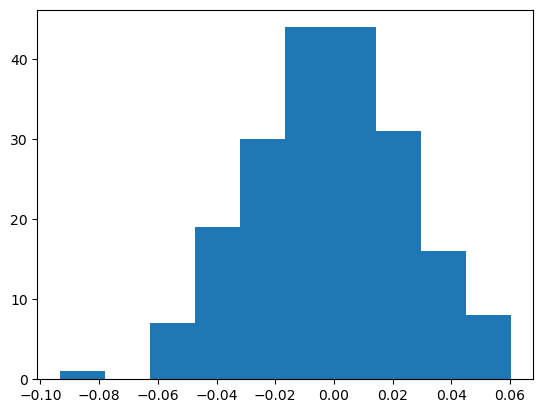

In [ ]:
dz1 = np.random.normal(mu/ndays, vol/np.sqrt(ndays), ndays)
#np.all(dz1>0)
plt.hist(dz1)
print(np.mean(dz1))

In [ ]:
X.shape

(1000,)

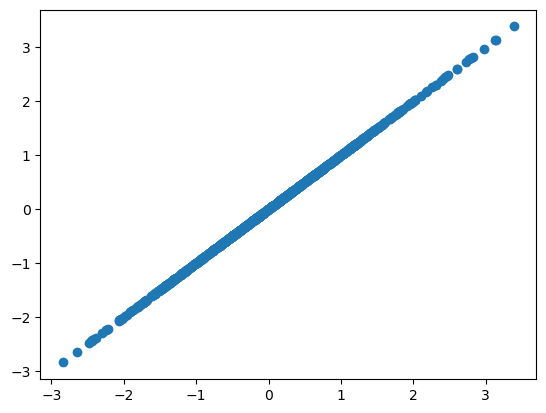

In [ ]:
mean = [0,0]
cov = [[1, 1],
       [1, 1]]
X, Y = np.random.multivariate_normal(mean, cov, N).T
plt.scatter(X,Y) 

In [ ]:
X

-1.1510029441411485

corr(X,Y) = [[1.         0.98606107]
 [0.98606107 1.        ]]
corr(X,Y) = 0.99


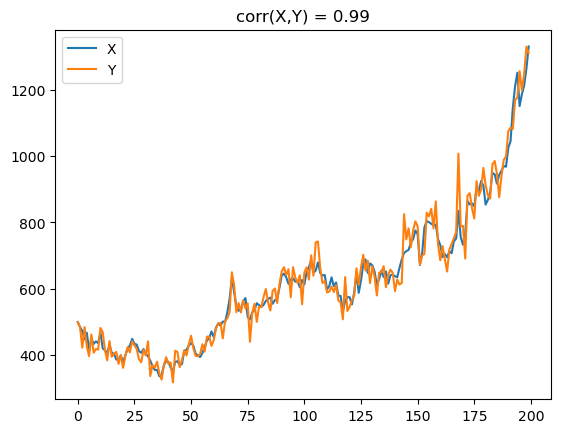

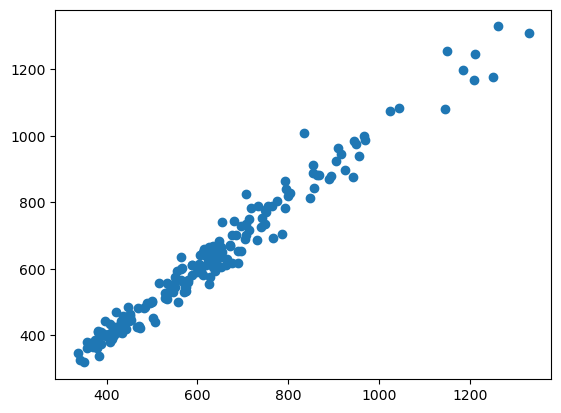

In [ ]:
# example of 2 highly correlated stock prices
X[0], Y[0] = 500, 500
np.random.seed(1)
dz1 = np.random.normal(mu/ndays, 0.05, ndays)+1 # random stock price change
np.random.seed(2)
dz2 = np.random.normal(mu/ndays, 0.05, ndays)+1 # random stock price change
for j in range(1,ndays):
    X[j] = X[j-1]*dz1[j]
    Y[j] = X[j]*dz2[j]

plt.plot(X, label='X')
plt.plot(Y, label='Y')
plt.title(f'corr(X,Y) = {np.round(np.corrcoef(X,Y)[0,1],2)}')
plt.legend()
print(f'corr(X,Y) = {np.corrcoef(X,Y)}')
print(f'corr(X,Y) = {np.round(np.corrcoef(X,Y)[0,1],2)}')
plt.figure()
plt.scatter(X,Y)

mean Sf = 609.6387
mean long-term return = 0.2193


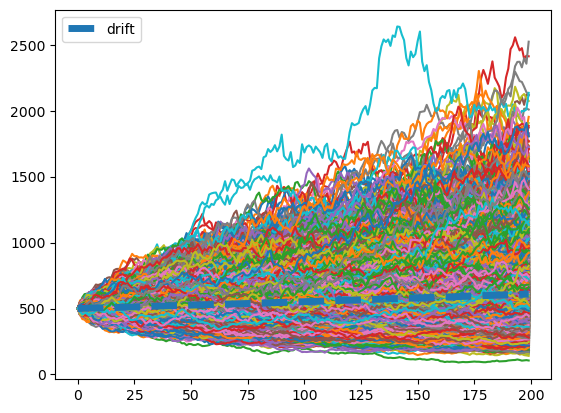

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

vol1, vol2 = 0.4, 0.4
mu1, mu2 = 0.2, 0.2
ndays = 200
S01, S02 = 500, 500
N = 10000

dz1 = np.random.normal(mu1/ndays, vol1/np.sqrt(ndays), (N,ndays))+1
dz2 = dz1
S1 = np.ones((ndays, N))*S01
drift = np.ones(ndays)*S01

for j in range(1,ndays):
    S1[j] = S1[j-1]*dz1[:,j]
    drift[j] = np.mean(S1[j])
Sf = S1[-1,:]

plt.plot(S1)
plt.plot(drift,'--', linewidth=5, label='drift')
plt.legend()

print(f'mean Sf = {np.round(np.mean(Sf),4)}')
print(f'mean long-term return = {np.round(np.mean(Sf)/S01-1,4)}')

mean Sf = 611.4614
mean long-term return = 0.2229


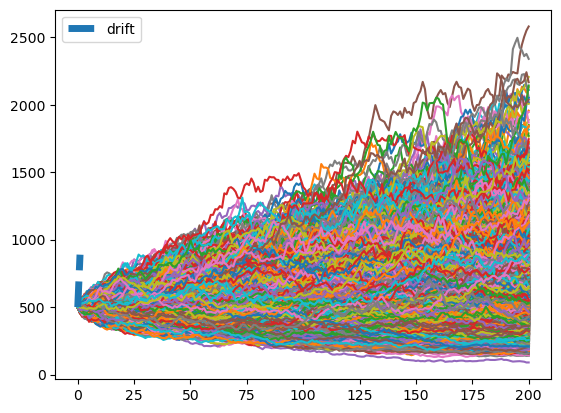

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

vol1, vol2 = 0.4, 0.4
mu1, mu2 = 0.2, 0.2
ndays = 200
S01, S02 = 500, 500
N = 10000

dz1 = np.random.normal(mu1/ndays, vol1/np.sqrt(ndays), (N,ndays))+1
dz2 = dz1
Sf = []
drift = np.ones(ndays)

for i in range(N):
    S1 = [S01]    
    for j in range(ndays):
        S1.append(S1[-1]*dz1[i,j])    
    plt.plot(S1)
    Sf.append(S1[-1])

plt.plot(drift,'--', linewidth=5, label='drift')
plt.legend()

print(f'mean Sf = {np.round(np.mean(Sf),4)}')
print(f'mean long-term return = {np.round(np.mean(Sf)/S01-1,4)}')

In [ ]:
np.shape(Sf)

(10000,)

In [ ]:
dz1[j]

1.002460244038988

## References
[1] Paul Wilmott Introduces Quantitative Finance, Second Edition
[2] Python for Finance
[3] Higher correlation multi-asset returns